# WordPress Open Data Notebook
### by Joakim Navarro 

## Resources
#### Existing reports:
* https://wordpress.org/about/stats/
* https://central.wordcamp.org/reports/
* https://github.com/WordPress/gutenberg/pulse
* https://central.wordcamp.org/schedule/

#### APIs:
* WordPress API documentation: https://learn.wordpress.org/tutorial/using-the-wordpress-rest-api/
* https://codex.wordpress.org/WordPress.org_API
* Past events: https://central.wordcamp.org/wp-json/wp/v2/wordcamps?page=1
* GitHub: https://docs.github.com/en/rest/using-the-rest-api/getting-started-with-the-rest-api
* Make: https://make.wordpress.org/wp-json/


## Past WordCamps Data

In [1]:
# Get all the libraries we'll need
import requests
import pprint
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


### Test connection

In [4]:
# URL + request & response
feed = 'https://central.wordcamp.org/wp-json/wp/v2/wordcamps?page=12'
response = requests.get(feed)

In [5]:
# Check if connection was successful
if response.status_code == 200:
    # Turn JSON into a list of dictionaries
    data = response.json()
    print("Success! Sample data:", data[1])
else:
    print(f"Error al obtener los datos: {response.status_code}")

Success! Sample data: {'id': 3163049, 'date': '2023-03-12T03:42:19', 'date_gmt': '2023-03-12T07:42:19', 'guid': {'rendered': 'https://central.wordcamp.org/wordcamps/wordcamp-nagpur-maharashtra-india-3/'}, 'modified': '2024-11-12T16:16:32', 'modified_gmt': '2024-11-12T21:16:32', 'slug': 'wordcamp-nagpur-maharashtra-india-3', 'status': 'wcpt-closed', 'type': 'wordcamp', 'link': 'https://central.wordcamp.org/wordcamps/wordcamp-nagpur-maharashtra-india-3/', 'title': {'rendered': 'WordCamp Nagpur'}, 'content': {'rendered': '<p>Nagpur WordPress User Group is pleased to announce the fifth edition of WordCamp Nagpur!</p>\n<p>At this annual conference, the community will come together in an event designed for developers, users, and beginners. A WordCamp to learn and share.</p>\n<p>Do join WordCamp in the Tiger Capital of India on September 28, 2024.</p>\n', 'protected': False}, 'author': 16218817, 'featured_media': 7071935, 'template': '', 'class_list': ['post-3163049', 'wordcamp', 'type-wordca

In [6]:
# See data in a more friendly way
pprint.pprint(data[1])

{'A/V Wrangler Name': '',
 'Available Rooms': '',
 'End Date (YYYY-mm-dd)': '1727481600',
 'Event Timezone': 'Asia/Kolkata',
 'Exhibition Space Available': '1',
 'Host region': '',
 'Location': 'Nagpur, Maharashtra, India',
 'Maximum Capacity': '600',
 'Number of Anticipated Attendees': '300',
 'Organizer Name': 'Nikita Sawarkar',
 'Physical Address': 'Chitnavis Centre, \r\n'
                     '56, Temple Road, \r\n'
                     'Civil Lines, \r\n'
                     'Nagpur 440 001',
 'Start Date (YYYY-mm-dd)': '1727481600',
 'Twitter': '@wcnagpur',
 'URL': 'https://nagpur.wordcamp.org/2024/',
 'Venue Name': 'Chitnavis Centre',
 'Virtual event only': '',
 'Website URL': 'http://chitnaviscentre.com',
 'WordCamp Hashtag': '#WCNagpur',
 'WordPress.org Username': 'nikita22',
 '_host_city': '',
 '_host_coordinates': '',
 '_host_country_code': '',
 '_host_country_name': '',
 '_host_state': '',
 '_host_street_name': '',
 '_host_street_number': '',
 '_host_zip': '',
 '_links': {

### Iterate all pages

In [7]:
# Define base url with no pages. Defining maximum limit of 100 objets per page:
base_url = 'https://central.wordcamp.org/wp-json/wp/v2/wordcamps?per_page=50&page='
i = 1
feed = base_url + str(i)
response = requests.get(feed)
data = []

# Loop: while page response is healthy (200) then go to next page and grab its data
while response.status_code == 200:
    new_data = response.json()
    i = i + 1
    feed = base_url + str(i)
    response = requests.get(feed)
    if isinstance(new_data, list):
        data = data + new_data
        print('processing page: ', i)

processing page:  2
processing page:  3
processing page:  4
processing page:  5
processing page:  6
processing page:  7
processing page:  8
processing page:  9
processing page:  10
processing page:  11
processing page:  12
processing page:  13
processing page:  14
processing page:  15
processing page:  16
processing page:  17
processing page:  18
processing page:  19
processing page:  20
processing page:  21
processing page:  22
processing page:  23
processing page:  24
processing page:  25
processing page:  26
processing page:  27


In [8]:
# How many objects (events) did we get?
print(len(data))

1286


In [9]:
# Create a dataframe (Pandas) from the acquired data
df = pd.json_normalize(data)
# Adjust column visualization so we can see all of them
pd.set_option('display.max_columns', None)
df

,id,date,date_gmt,modified,modified_gmt,slug,status,type,link,author,featured_media,template,class_list,Start Date (YYYY-mm-dd),End Date (YYYY-mm-dd),Event Timezone,Location,URL,Twitter,WordCamp Hashtag,Number of Anticipated Attendees,Organizer Name,WordPress.org Username,A/V Wrangler Name,Virtual event only,Host region,Venue Name,Physical Address,Maximum Capacity,Available Rooms,Website URL,Exhibition Space Available,_venue_street_name,_venue_street_number,_venue_city,_venue_state,_venue_country_code,_venue_country_name,_venue_zip,_host_coordinates,_host_street_name,_host_street_number,_host_city,_host_state,_host_country_code,_host_country_name,_host_zip,session_start_time,jetpack_sharing_enabled,guid.rendered,title.rendered,content.rendered,content.protected,_venue_coordinates.latitude,_venue_coordinates.longitude,_links.self,_links.collection,_links.about,_links.author,_links.version-history,_links.predecessor-version,_links.wp:featuredmedia,_links.wp:attachment,_links.curies,_venue_coordinates,_host_coordinates.latitude,_host_coordinates.longitude
0,8706525,2024-11-26T20:35:51,2024-11-27T01:35:51,2024-12-17T10:34:22,2024-12-17T15:34:22,wordcamp-zaragoza-2025,wcpt-scheduled,wordcamp,https://central.wordcamp.org/wordcamps/wordcam...,15788922,8935582,,"[post-8706525, wordcamp, type-wordcamp, status...",1739491200,1739577600,Europe/Madrid,"Zaragoza, Spain",https://zaragoza.wordcamp.org/2025/,@zaragozawp,#WCZGZ25,250 - 280,Susana Ibáñez,shusica,,,,Etopia,"Avda. Ciudad de Soria, 8 – 50003 Zaragoza\r\n",,,https://etopia.es/,,Avenida de la Ciudad de Soria,8,Zaragoza,Aragón,ES,Spain,50003,,,,,,,,,0,True,https://central.wordcamp.org/wordcamps/wordcam...,WordCamp Zaragoza 2025,<p>¡Bienvenidos a WordCamp Zaragoza 2025!</p>\...,False,41.659396,-0.907240,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'embeddable': True, 'href': 'https://central...","[{'count': 4, 'href': 'https://central.wordcam...","[{'id': 8935584, 'href': 'https://central.word...","[{'embeddable': True, 'href': 'https://central...",[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'name': 'wp', 'href': 'https://api.w.org/{re...",NaN,NaN,NaN
1,8422107,2024-11-01T12:23:36,2024-11-01T16:23:36,2024-12-13T05:08:30,2024-12-13T10:08:30,wordcamp-krakow-poland,wcpt-scheduled,wordcamp,https://central.wordcamp.org/wordcamps/wordcam...,16170798,0,,"[post-8422107, wordcamp, type-wordcamp, status...",1750982400,1751155200,Europe/Warsaw,"Kraków, Poland",https://krakow.wordcamp.org/2025/,,#WCKRK,500,Sebastian Miśniakiewicz,sebastianm,Marcin Andrzejewski,,,Politechnika Krakowska,Politechnika Krakowska\r\n&quot;Działownia&quo...,500,4,https://www.pk.edu.pl/index.php?option=com_con...,1,Warszawska,24,Kraków,Województwo małopolskie,PL,Poland,31-155,,,,,,,,,0,True,https://central.wordcamp.org/wordcamps/wordcam...,"WordCamp Kraków, Poland",<p>WordCamp Kraków 2025 to największe wydarzen...,False,50.071798,19.939965,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'embeddable': True, 'href': 'https://central...","[{'count': 3, 'href': 'https://central.wordcam...","[{'id': 8710701, 'href': 'https://central.word...",NaN,[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'name': 'wp', 'href': 'https://api.w.org/{re...",NaN,NaN,NaN
2,8262696,2024-10-18T04:30:45,2024-10-18T08:30:45,2024-12-19T22:50:16,2024-12-20T03:50:16,wordcamp-iskandar-puteri-johor-bahru-johor-mal...,wcpt-scheduled,wordcamp,https://central.wordcamp.org/wordcamps/wordcam...,17449577,0,,"[post-8262696, wordcamp, type-wordcamp, status...",1747440000,1747440000,Asia/Kuala_Lumpur,"Iskandar Puteri / Johor Bahru, Johor, Malaysia",https://johorbahru.wordcamp.org/2025/,,#wcjb,150,Yves Tan,yves13,CV Chon,,,42 Iskandar Puteri,"Unit 01-12, Level 1, Sunway GRID,\r\nPersiaran...",150,3,https://42iskandarputeri.edu.my/,1,Persiar

In [10]:
# See all available columns
print(df.columns)

Index(['id', 'date', 'date_gmt', 'modified', 'modified_gmt', 'slug', 'status',
       'type', 'link', 'author', 'featured_media', 'template', 'class_list',
       'Start Date (YYYY-mm-dd)', 'End Date (YYYY-mm-dd)', 'Event Timezone',
       'Location', 'URL', 'Twitter', 'WordCamp Hashtag',
       'Number of Anticipated Attendees', 'Organizer Name',
       'WordPress.org Username', 'A/V Wrangler Name', 'Virtual event only',
       'Host region', 'Venue Name', 'Physical Address', 'Maximum Capacity',
       'Available Rooms', 'Website URL', 'Exhibition Space Available',
       '_venue_street_name', '_venue_street_number', '_venue_city',
       '_venue_state', '_venue_country_code', '_venue_country_name',
       '_venue_zip', '_host_coordinates', '_host_street_name',
       '_host_street_number', '_host_city', '_host_state',
       '_host_country_code', '_host_country_name', '_host_zip',
       'session_start_time', 'jetpack_sharing_enabled', 'guid.rendered',
       'title.rendered', 'conte

In [11]:
# Get a new filtered dataframe with events-wordcamps only in Bilbao
bilbao_df = df[df['Location'].str.contains('Bilbao', case=False, na=False)]

bilbao_df

,id,date,date_gmt,modified,modified_gmt,slug,status,type,link,author,featured_media,template,class_list,Start Date (YYYY-mm-dd),End Date (YYYY-mm-dd),Event Timezone,Location,URL,Twitter,WordCamp Hashtag,Number of Anticipated Attendees,Organizer Name,WordPress.org Username,A/V Wrangler Name,Virtual event only,Host region,Venue Name,Physical Address,Maximum Capacity,Available Rooms,Website URL,Exhibition Space Available,_venue_street_name,_venue_street_number,_venue_city,_venue_state,_venue_country_code,_venue_country_name,_venue_zip,_host_coordinates,_host_street_name,_host_street_number,_host_city,_host_state,_host_country_code,_host_country_name,_host_zip,session_start_time,jetpack_sharing_enabled,guid.rendered,title.rendered,content.rendered,content.protected,_venue_coordinates.latitude,_venue_coordinates.longitude,_links.self,_links.collection,_links.about,_links.author,_links.version-history,_links.predecessor-version,_links.wp:featuredmedia,_links.wp:attachment,_links.curies,_venue_coordinates,_host_coordinates.latitude,_host_coordinates.longitude
65,4563311,2023-11-21T07:00:38,2023-11-21T12:00:38,2024-04-21T20:27:00,2024-04-22T00:27:00,wordcamp-bilbao-2024-spain,wcpt-closed,wordcamp,https://central.wordcamp.org/wordcamps/wordcam...,14888264,0,,"[post-4563311, wordcamp, type-wordcamp, status...",1713571200,1713657600,Europe/Madrid,"Bilbao, Bizkaia, Spain",https://bilbao.wordcamp.org/2024/,@wcbilbao,#WCBilbao2024,250,Francisco Gonzalez Gomez,madrillano,Asier Larrañaga,,,Bilbao AS Fabrik – Mondragon Unibertsitatea,"Olagorta Kalea, 26 (Zorrozaure)\r\nDeusto, 480...",300,5,https://www.mondragon.edu/es/donde-estamos/bil...,,Olagorta Kalea,26,Bilbo,Euskadi,ES,Spain,48014,,,,,,,,,0,True,https://central.wordcamp.org/wordcamps/wordcam...,"WordCamp Bilbao, Bizkaia, Spain",<h1>¡Ven a la WordCamp Bilbao 2024!</h1>\n<p>¿...,False,43.271957,-2.963418,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'embeddable': True, 'href': 'https://central...","[{'count': 3, 'href': 'https://central.wordcam...","[{'id': 5556710, 'href': 'https://central.word...",NaN,[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'name': 'wp', 'href': 'https://api.w.org/{re...",NaN,NaN,NaN
335,3075496,2018-10-23T18:32:29,2018-10-23T22:32:29,2019-05-24T05:19:19,2019-05-24T09:19:19,wordcamp-bilbao-2019,wcpt-closed,wordcamp,https://central.wordcamp.org/wordcamps/wordcam...,13545685,0,,"[post-3075496, wordcamp, type-wordcamp, status...",1556323200,1556409600,,"Bilbao, Bizkaia, Spain.",https://bilbao.wordcamp.org/2019/,WCBilbao,#WCBilbao,185,Fernan Díez,fernandiez,,,,Museo Marítimo Ría de Bilbao,"Ramón de la Sota Kaia, 1\r\n48011 Bilbao (Bizk...",185,2,http://www.museomaritimobilbao.eus/,,Ramón de la Sota Kaia,1,Bilbo,Euskadi,ES,Spain,48009,,,,,,,,,0,True,https://central.wordcamp.org/wordcamps/wordcam...,WordCamp Bilbao,<p>Welcome to WordCamp Bilbao 2019!</p>\n<p>Th...,False,43.266328,-2.946203,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'embeddable': True, 'href': 'https://central...","[{'count': 6, 'href': 'https://central.wordcam...","[{'id': 3079994, 'href': 'https://central.word...",NaN,[{'href': 'https://central.wordcamp.org/wp-jso...,"[{'name': 'wp', 'href': 'https://api.w.org/{re...",NaN,NaN,NaN
486,3056282,2017-10-13T11:21:02,2017-10-13T15:21:02,2018-05-20T20:07:32,2018-05-21T00:07:32,wordcamp-bilbao-2018,wcpt-closed,wordcamp,https://central.wordcamp.org/wordcamps/wordcam...,13545685,3059741,,"[post-3056282, wordcamp, type-wordcamp, status...",1526688000,1526774400,,"Bilbao, Bizkaia (Spain)",https://bilbao.wordcamp.org/2018/,https://twitter.com/WCBilbao,#WCBilbao,150,Fernan Díez,fernandiez,Marcos Ramajo,,,Museo Marítimo Ría de Bilbao,"Ramón de la Sota Kaia, 1\r\n48011 Bilbo, Bizka...",300,4,http://www.museomaritimobilbao.eus/,,Ramón de la Sota Kaia

In [13]:
# Extra transformations:
df['Start Date'] = pd.to_datetime(df['Start Date (YYYY-mm-dd)'], unit='s') # Start date to dateframe format
df = df.rename(columns={'_venue_country_code': 'Country'}) # Rename column

# Select some specific columns: from 67 to 11
df_curated = df[['id', 'slug', 'type', 'status', 'URL', 'Start Date', 'Location', 'Twitter', 'Organizer Name', 'Venue Name', 'Country' ]]

# Create the 'Year' column with integer format
df_curated['Year'] = df_curated['Start Date'].dt.year
df_curated['Year'] = df_curated['Year'].astype('Int64')
df_curated

/var/folders/f0/s3n4kl4n13s9nb6057_745nw0000gn/T/ipykernel_4811/3320786627.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['Start Date'] = pd.to_datetime(df['Start Date (YYYY-mm-dd)'], unit='s') # Start date to dateframe format
/var/folders/f0/s3n4kl4n13s9nb6057_745nw0000gn/T/ipykernel_4811/3320786627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curated['Year'] = df_curated['Start Date'].dt.year
/var/folders/f0/s3n4kl4n13s9nb6057_745nw0000gn/T/ipykernel_4811/3320786627.py:10: S

,id,slug,type,status,URL,Start Date,Location,Twitter,Organizer Name,Venue Name,Country,Year
0,8706525,wordcamp-zaragoza-2025,wordcamp,wcpt-scheduled,https://zaragoza.wordcamp.org/2025/,2025-02-14,"Zaragoza, Spain",@zaragozawp,Susana Ibáñez,Etopia,ES,2025
1,8422107,wordcamp-krakow-poland,wordcamp,wcpt-scheduled,https://krakow.wordcamp.org/2025/,2025-06-27,"Kraków, Poland",,Sebastian Miśniakiewicz,Politechnika Krakowska,PL,2025
2,8262696,wordcamp-iskandar-puteri-johor-bahru-johor-mal...,wordcamp,wcpt-scheduled,https://johorbahru.wordcamp.org/2025/,2025-05-17,"Iskandar Puteri / Johor Bahru, Johor, Malaysia",,Yves Tan,42 Iskandar Puteri,MY,2025
3,8064915,wordcamp-montclair-nj-usa-3,wordcamp,wcpt-scheduled,https://montclair.wordcamp.org/2025/,2025-06-28,"Montclair, NJ, USA",WCMontclair,Mike Auteri,Montclair State University,US,2025
4,7817649,wordcampnepal2025,wordcamp,wcpt-scheduled,https://nepal.wordcamp.org/2025/,2025-04-04,"Kathmandu, Nepal",@wordcampnepal,Surendra Shrestha,Kundalini Durbar Banquet,NP,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
1281,1813,argentina-2007,wordcamp,wcpt-closed,,2007-10-31,"Buenos Aires, Argentina",,,,AR,2007
1282,1811,israel-2007,wordcamp,wcpt-closed,,2007-10-05,"Tel Aviv, Israel",,,,IL,2007
1283,1809,beijing-2007,wordcamp,wcpt-closed,,2007-09-01,"Beijing, China",,,,CN,2007
1284,1807,san-francisco-2007,wordcamp,wcpt-closed,https://sf.wordcamp.org/2007/,2007-07-21,"San Francisco, California",,,,US,2007


## Graph with aggregated data

In [14]:
# Filter 3 European countries: Spain, Italy and Germany
eu_df = df_curated[df_curated['Country'].isin(['ES', 'IT', 'DE'])]

# Agrupar por 'country' y 'year' y contar eventos
aggregated_df = eu_df.groupby(['Country', 'Year']).size().reset_index(name='Events')
aggregated_df

,Country,Year,Events
0,DE,2008,1
1,DE,2009,1
2,DE,2010,1
3,DE,2011,1
4,DE,2014,1
5,DE,2015,2
6,DE,2016,3
7,DE,2017,2
8,DE,2018,3
9,DE,2019,4


Note: you may need to restart the kernel to use updated packages.


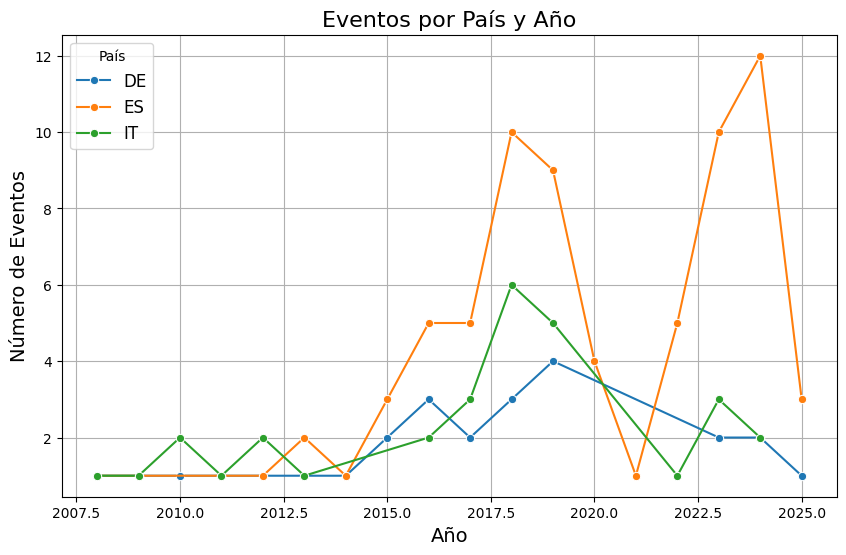

In [15]:
# Visualize the experiment

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de líneas usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_df, x='Year', y='Events', hue='Country', marker='o')

# Personalizar el gráfico
plt.title('Eventos por País y Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Eventos', fontsize=14)
plt.legend(title='País', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.show()